In [1]:
from tensorflow import keras

2023-11-13 18:59:02.275009: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 18:59:02.275046: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 18:59:02.275075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 18:59:02.281965: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 18:59:03.330157: W tensorflow/compiler/

In [2]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation=keras.activations.relu))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

2023-11-13 18:59:05.232053: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.09126735, -0.23459277, -0.1341478 ,  0.13791394, -0.07695684,
         -0.16673273, -0.04049459, -0.11050825, -0.052064  ,  0.06277105,
          0.23420674,  0.07454452,  0.24323851,  0.06977102,  0.2023772 ,
         -0.25250497, -0.29689515,  0.05550602, -0.15676692, -0.19690984,
         -0.11737958,  0.2628227 ,  0.04000643,  0.04681611, -0.07239559,
          0.02235222, -0.0418691 ,  0.16390988,  0.00271371,  0.29138917,
         -0.14751188,  0.14159688,  0.07466143,  0.1457322 ,  0.11729932,
          0.22483814,  0.23142481, -0.02017784, -0.23569031,  0.23062515,
         -0.10165581,  0.2580766 ,  0.14526045, -0.02692795, -0.15397967,
          0.01561972, -0.07780673, -0.21573749,  0.11333895,  0.29004055,
         -0.20372772, -0.17435777, -0.04166961, -0.05846986, -0.12184685,
          0.21875483,  0.2593627 , -0.2203623 , -0.01738358, -0.2238794 ,
         -0.03341264,  0.15822533, -0.1691883

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Declaring names for the model and its layers

In [5]:
model = keras.Sequential(name="the_example_model")
model.add(keras.layers.Dense(64, activation=keras.activations.relu, name="the_first_layer"))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax, name="the_second_layer"))

In [6]:
model.build(input_shape=(None, 3))

In [7]:
model.summary()

Model: "the_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 the_first_layer (Dense)     (None, 64)                256       
                                                                 
 the_second_layer (Dense)    (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Declaring the shape of the inputs of the model in advance

In [8]:
model = keras.Sequential()
model.add(keras.Input(shape=(3, ))) # the shape argument here represents the shape of each sample, not one batch
model.add(keras.layers.Dense(64, keras.activations.relu))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

In [11]:
model.summary() # Checking properties of the model without using the buold function

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 7.2.2 The Functional API

In [12]:
inputs = keras.Input(shape=(3, ), name="my_input")
features = keras.layers.Dense(64, activation=keras.activations.relu)(inputs)
outputs = keras.layers.Dense(10, activation=keras.activations.relu)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

#### Multi-input, multi-output models

In [13]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size, ), name="title")
text_body = keras.Input(shape=(vocabulary_size, ), name="text_body")
tags = keras.Input(shape=(num_tags, ), name="tags")

features = keras.layers.Concatenate()([title, text_body, tags])
features = keras.layers.Dense(64, activation=keras.activations.relu)(features)

priority = keras.layers.Dense(1, activation=keras.activations.sigmoid, name="priority")(features)
department = keras.layers.Dense(num_departments, activation=keras.activations.softmax, name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### Training a multi-input, multi-output model

In [14]:
import numpy as np

num_samples = 1280

# Dummy input data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# Dummy target data
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [15]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss={"priority": keras.losses.mean_squared_error, "department": keras.losses.categorical_crossentropy},
    metrics={"priority": [keras.metrics.mean_absolute_error], "department": [keras.metrics.Accuracy()]}
)

##### Writing the inputs, outputs etc. as a dictionary instead of a list gives flexibility to assign names for each data

In [16]:
model.fit(
    {"title" : title_data, "text_body" : text_body_data, "tags" : tags_data},
    {"priority" : priority_data, "department" : department_data},
    epochs=1
)

40/40 [==============================] - 1s 17ms/step - loss: 19.9997 - priority_loss: 0.3211 - department_loss: 19.6785 - priority_mean_absolute_error: 0.4897 - department_accuracy: 0.0000e+00


In [17]:
model.evaluate(
    {"title" : title_data, "text_body" : text_body_data, "tags" : tags_data},
    {"priority" : priority_data, "department" : department_data}
)

40/40 [==============================] - 0s 6ms/step - loss: 9.9777 - priority_loss: 0.3264 - department_loss: 9.6513 - priority_mean_absolute_error: 0.4954 - department_accuracy: 0.0000e+00


[9.97769546508789,
 0.3263596296310425,
 9.651335716247559,
 0.4954450726509094,
 0.0]

In [18]:
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

40/40 [==============================] - 0s 5ms/step


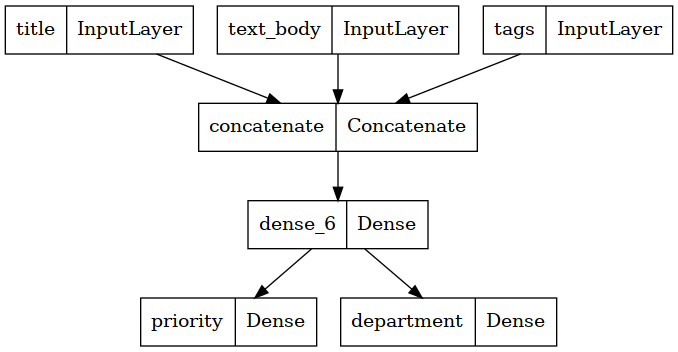

In [19]:
keras.utils.plot_model(model, "ticket_classifier.png")

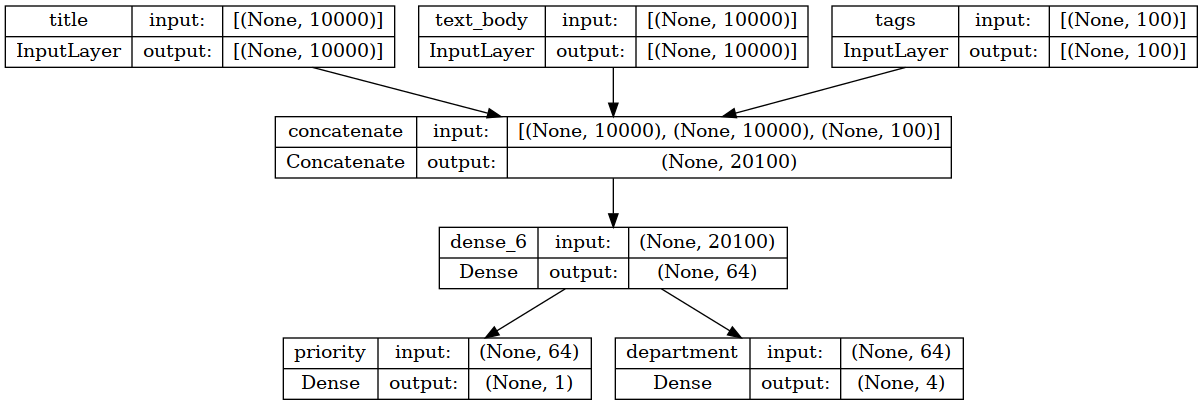

In [20]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True)

In [21]:
model.layers

In [22]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

#### Creating a new model by reusing intermediate layer outputs

In [25]:
features = model.layers[4].output
difficulty = keras.layers.Dense(3, activation=keras.activations.softmax, name="difficulty")(features)

In [26]:
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty]
)

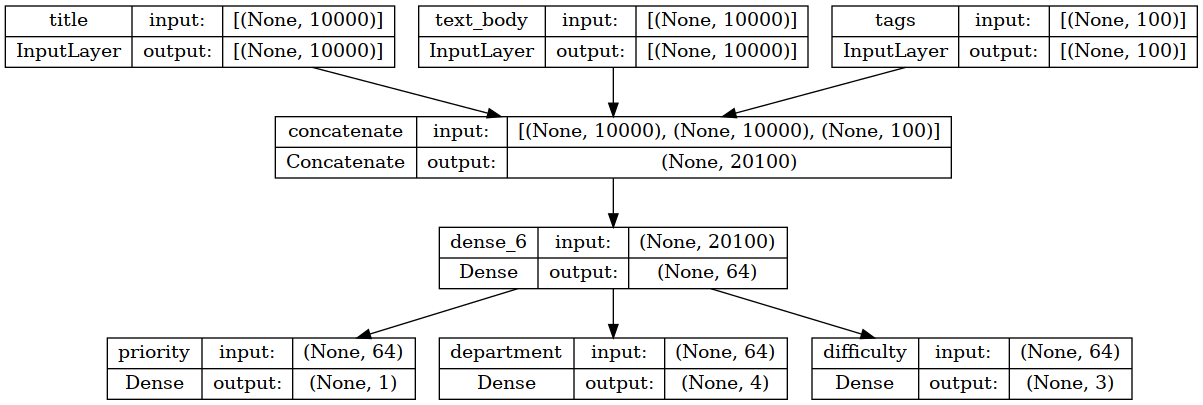

In [27]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

## Rewriting the previous example as a subclass model

#### A Simple Subclassed Model

In [28]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = keras.layers.Concatenate()
        self.mixing_layer = keras.layers.Dense(64, activation=keras.activations.relu)
        self.priority_scorer = keras.layers.Dense(1, activation=keras.activations.sigmoid)
        self.department_classifier = keras.layers.Dense(num_departments, activation=keras.activations.softmax)

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)

        priority = self.priority_scorer(features)
        department = self.department_classifier(features)

        return priority, department

In [30]:
model = CustomerTicketModel(num_departments=4)

priority, department = model({"title" : title_data, "text_body" : text_body_data, "tags" : tags_data})

2023-11-13 20:13:36.445987: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205824000 exceeds 10% of free system memory.


In [50]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=[keras.losses.mean_squared_error, keras.losses.categorical_crossentropy],
    metrics=[[keras.metrics.mean_absolute_error], [keras.metrics.Accuracy()]]
)

In [52]:
model.fit(
    {
        "title" : title_data,
        "text_body" : text_body_data,
        "tags" : tags_data
    },
    [priority_data, department_data],
    epochs=1
)

40/40 [==============================] - 1s 17ms/step - loss: 39.7374 - output_1_loss: 0.3355 - output_2_loss: 39.4019 - output_1_mean_absolute_error: 0.5046 - output_2_accuracy: 0.0000e+00


In [54]:
model.evaluate(
    {
        "title" : title_data,
        "text_body" : text_body_data,
        "tags" : tags_data
    },
    [priority_data, department_data]
)

40/40 [==============================] - 0s 6ms/step - loss: 29.3763 - output_1_loss: 0.3355 - output_2_loss: 29.0408 - output_1_mean_absolute_error: 0.5046 - output_2_accuracy: 0.0000e+00


[29.376312255859375,
 0.3354696035385132,
 29.040847778320312,
 0.5045549869537354,
 0.0]

In [55]:
priority_preds, department_preds = model.predict(
    {
        "title" : title_data,
        "text_body" : text_body_data,
        "tags" : tags_data
    }
)

40/40 [==============================] - 0s 6ms/step


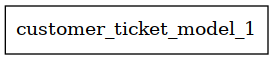

In [56]:
keras.utils.plot_model(model, "ticket_classifier_with_subclass_model.png")  # bruh

#### Creating a functional model that includes a subclass model

In [61]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = keras.activations.sigmoid
        else:
            num_units = num_classes
            activation = keras.activations.softmax
        self.dense = keras.layers.Dense(num_units, activation=activation)
    
    def call(self, inputs):
        return self.dense(inputs)

In [62]:
inputs = keras.Input(shape=(3, ))
features = keras.layers.Dense(64, activation=keras.activations.relu)(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

#### Creating a subclass model that includes a functional model

In [63]:
inputs = keras.Input(shape=(64, ))
outputs = keras.layers.Dense(1, activation=keras.activations.sigmoid)(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

In [64]:
class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = keras.layers.Dense(64, activation=keras.activations.relu)
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier

In [65]:
model = MyModel()